<a href="https://colab.research.google.com/github/trushnes/Cancer-Classification/blob/main/TarushiJat_DLAsgn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem : Predicting whether breast cancer is benign or malignant.**

* **Splited dataset into 80:20 and tabulated the result**
* **Used 10-fold cross validation and tabulated the results**
* **Changed the hyperparameter of SVM and random forest and plotted the accuracy.**

# **1. Making Necessary Imports**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, accuracy_score

from sklearn.model_selection import KFold, GridSearchCV
from sklearn import svm
from sklearn.svm import SVC



# **2. Dataset Details**

I have used **''Breast Cancer Wisconsin (Original) Data Set''** which is collected from **UCI Machine Learning Repositary.** 

**Source :** https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28original%29


    





**2.1 Loading Dataset from csv file**

In [ ]:
cell_df = pd.read_csv('/content/sample_data/cancer_dataset.csv')

* **Number of Instances:** 699 





* **Number of Attributes:** 10 plus the class attribute

In [ ]:
cell_df.shape

(699, 11)

**2.2 Attribute Details**

* **ID :** Sample code number

* **Clump :** Clump Thickness

* **UnifSize :** Uniformity of Cell Size 

* **UnifShape :** Uniformity of Cell Shape

* **MargAdh :** Marginal Adhesion

* **SingEpiSize :** Single Epithelial Cell Size

* **BareNuc :** Bare Nuclei  

* **BlandChrom :** Bland Chromatin 

* **NormNucl :** Normal Nucleoli 

* **Mit :** Mitoses 

* **Class :** 2 for benign, 4 for malignant

In [ ]:
cell_df.tail()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


* **Number of instances of benign (class - 2):** 458

* **Number of instances of Malignant (class - 4):** 241

In [ ]:
cell_df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

**2.3 Visualising distribution of the classes**

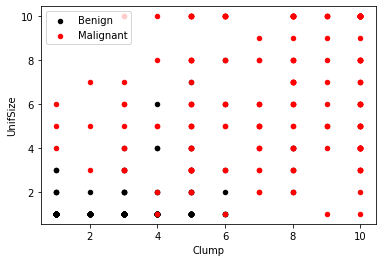

In [ ]:
benign_df = cell_df[cell_df['Class']==2][0:200]  #Extracting only those rows having class attribute 2
malignant_df = cell_df[cell_df['Class']==4][0:200] #Extracting only those rows having class attribute 4

axes = benign_df.plot(kind='scatter', x='Clump', y='UnifSize', color='black', label='Benign')
malignant_df.plot(kind='scatter', x='Clump', y='UnifSize', color='red', label='Malignant', ax=axes)

**2.4 Identifying unwanted rows**

In [ ]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

Here, **BareNuc** column is having data type as object, which is not a numeric value and thus I can not apply mathematical opeartion on this particular column.
So, I will convert all the values of BareNuc column to numeric type using pands library to_numeric.


In [ ]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()] # alternative choice of coerce is ignore.
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

**2.5 Removing unwanted columns**

In [ ]:
cell_df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

I am removing ID attribute here because it is not going to contribute in next predication. It is just a identifier for rows.

In [ ]:
features_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

X = np.asarray(features_df)     #Independent Varibale X

y = np.asarray(cell_df['Class'])  #Dependent Variable y

X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [ ]:
y[0:5]

array([2, 2, 2, 2, 2])

# **3. Spliting the dataset into train and test (80 : 20) & tablulating result**

In [ ]:
'''
cell_df (100) ---> train(80) / test(20)
Train(X,y)  #X itself is 2D array & y is 1D array
Test(X,y)
'''
from sklearn.model_selection import train_test_split
from tabulate import tabulate

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

table = [["X_train",X_train.shape[0],X_train.shape[1]],["X_test",X_test.shape[0],X_test.shape[1]],
         ["y_train",y_train.shape[0],1],["y_test",y_test.shape[0],1]]

print(tabulate(table, headers=["Train & Test","Records","Attributes"],tablefmt="github"))



| Train & Test   |   Records |   Attributes |
|----------------|-----------|--------------|
| X_train        |       546 |            9 |
| X_test         |       137 |            9 |
| y_train        |       546 |            1 |
| y_test         |       137 |            1 |


# **4. Use 10-fold cross validation and tabulate the results**

**4.1 Initialization of K-fold algorithm**

In [ ]:
k = 10
cv = KFold(n_splits=10, shuffle=False)
classifier = svm.SVC(kernel='linear', gamma='auto', C=2)

**4.2 K- fold cross algorithm and SVM classification model**

In [ ]:
scores = []
itr = k

for train_index, test_index in cv.split(X):
    
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

    classifier.fit(X_train, y_train)
    y_predict = classifier.predict(X_test)

    acc = accuracy_score(y_predict, y_test)
    scores.append(acc)
    print('Accuracy of {}th fold = {}%'.format((k-itr+1),np.round(acc*100,2)))
    itr-=1
    
  
avg_acc_score = sum(scores) / k

print('\nTraining dataset for each fold = {}'.format(len(train_index)))
print('\nTesting dataset for each fold = {}'.format(len(test_index)))
print('\nMean Accuracy of all {} folds = {}%'.format(k, np.round(avg_acc_score*100, 2)))

Accuracy of 1th fold = 91.3%
Accuracy of 2th fold = 98.55%
Accuracy of 3th fold = 98.55%
Accuracy of 4th fold = 94.12%
Accuracy of 5th fold = 92.65%
Accuracy of 6th fold = 100.0%
Accuracy of 7th fold = 95.59%
Accuracy of 8th fold = 98.53%
Accuracy of 9th fold = 98.53%
Accuracy of 10th fold = 98.53%

Training dataset for each fold = 615

Testing dataset for each fold = 68

Mean Accuracy of all 10 folds = 96.63%


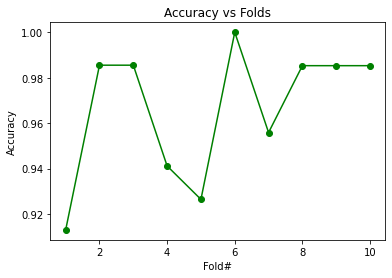

In [ ]:
plt.plot(np.arange(1, k+1), scores, marker='o', linestyle='solid',color='green')
plt.xlabel('Fold#')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Folds')
plt.show()

So, here getting accuracy as high as 100.00% in 6th fold
and as low as 91.3% in 1st fold

**4.3 K- fold cross algorithm and Random Forest classification model**

In [ ]:
k = 10
c_v = KFold(n_splits=10, shuffle=False)
model = RandomForestClassifier(n_estimators=20, max_depth=10)

In [ ]:
scores = []
itr = k

for train_index, test_index in c_v.split(X):
    
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    ac = accuracy_score(y_pred, y_test)
    scores.append(ac)
    print('Accuracy of {}th fold = {}%'.format((k-itr+1),np.round(ac*100,2)))
    itr-=1

avg_ac_score = sum(scores) / k

print('\nTraining dataset for each fold = {}'.format(len(train_index)))
print('\nTesting dataset for each fold = {}'.format(len(test_index)))
print('\nMean Accuracy of all {} folds = {}%'.format(k, np.round(avg_ac_score*100, 2)))


Accuracy of 1th fold = 86.96%
Accuracy of 2th fold = 98.55%
Accuracy of 3th fold = 98.55%
Accuracy of 4th fold = 92.65%
Accuracy of 5th fold = 92.65%
Accuracy of 6th fold = 100.0%
Accuracy of 7th fold = 95.59%
Accuracy of 8th fold = 100.0%
Accuracy of 9th fold = 97.06%
Accuracy of 10th fold = 100.0%

Training dataset for each fold = 615

Testing dataset for each fold = 68

Mean Accuracy of all 10 folds = 96.2%


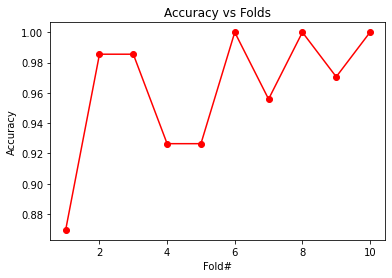

In [ ]:
plt.plot(np.arange(1, k+1), scores, marker='o', linestyle='solid',color='red')
plt.xlabel('Fold#')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Folds')
plt.show()

So, here getting accuracy as high as 100.00% in 8th, 9th & 10th folds
and as low as 89.86% in 1st fold

# **5. Change the hyperparameter of SVM and random forest and plot the accuracy**

**5.1 Support Vector Classifier**

Support vector classifier with linear kernel and C = 10

In [ ]:
classifier = svm.SVC(kernel='linear', gamma='scale', C=10)

clf = classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)

print('Accuracy of Linear SVC on training set: {:.2f}%'.format(clf.score(X_train, y_train)*100))
print('Accuracy of Linear SVC on test set: {:.2f}%'.format(clf.score(X_test, y_test)*100))


Accuracy of Linear SVC on training set: 97.07%
Accuracy of Linear SVC on test set: 98.53%


**Tuning C parameter :** 

C (Regularisation): C is the penalty parameter, which represents misclassification or error term. The misclassification or error term tells the SVM optimisation how much error is bearable. I have used GridSearchCV algorithm for tuning the hyperparameter.

In [ ]:

param_grid = {'C': [0.1, 1, 10, 100]}

grid = GridSearchCV(clf,param_grid,refit=True)
temp_grid = grid.fit(X_train, y_train)
best_C = grid.best_params_['C']
print("The best value of hyper-parameter C : {:.3f}" .format(best_C))
print( "Best estimator accuracy on test set {:.3f} ".format(grid.best_estimator_.score(X_test, y_test) * 100 ) )

The best value of hyper-parameter C : 0.100
Best estimator accuracy on test set 98.529 


Updating classifier with best C value

In [ ]:
clf = SVC(kernel ='linear', gamma='auto', C=best_C).fit(X_train,y_train)

Confusion Matrix [[54  1]
 [ 0 13]]


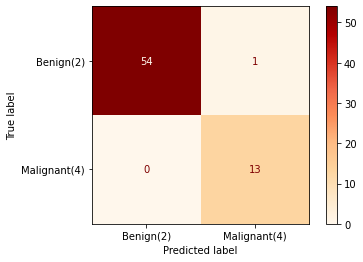

In [ ]:
target_names = ["Benign(2)", "Malignant(4)"]
cm = confusion_matrix(y_test,classifier.predict(X_test))
print("Confusion Matrix",cm)
vis = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.OrRd, display_labels = target_names)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           2       1.00      0.98      0.99        55
           4       0.93      1.00      0.96        13

    accuracy                           0.99        68
   macro avg       0.96      0.99      0.98        68
weighted avg       0.99      0.99      0.99        68



**5.2 Random Forest Classification**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

**Setting Hperparameters:** 

1. n_estimator : The n_estimators parameter specifies the number of trees in the forest of the model.(Default value = 10)

2. max_depth : The max_depth parameter specifies the maximum depth of each tree. (default value = None)

Here, setting n_estimator to 20 and max_depth to 10 

Accuracy is:  97.08029197080292
[[84  0]
 [ 4 49]]


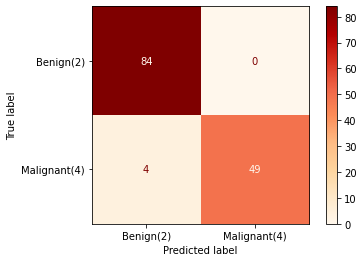

In [ ]:
model = RandomForestClassifier(n_estimators=20, max_depth=10)
v = model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred_train = model.predict(X_train)
ac = accuracy_score(y_test, y_pred)

print('Accuracy is: ',ac*100)
cm = confusion_matrix(y_test,model.predict(x_test))
print(cm)
vis = plot_confusion_matrix(v, x_test, y_test, cmap=plt.cm.OrRd, display_labels = target_names)
plt.show()



Now, taking n_estimator and max_depth with their default values

Accuracy is:  95.62043795620438
[[83  1]
 [ 5 48]]


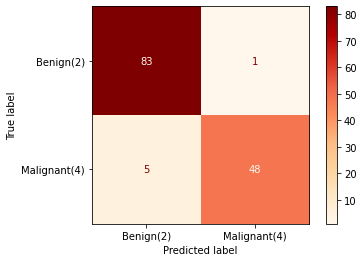

In [ ]:
model = RandomForestClassifier()
z = model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred_train = model.predict(X_train)
ac = accuracy_score(y_test, y_pred)

print('Accuracy is: ',ac*100)
cm = confusion_matrix(y_test,model.predict(x_test))
print(cm)
vis = plot_confusion_matrix(z, x_test, y_test, cmap=plt.cm.OrRd, display_labels = target_names)
plt.show()

So with default values of n_estimator and max_depth, getting accuracy of 95.62% 

and with n_estimator = 20 & max_depth = 10, getting accuracy of 97.08%

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.97      0.99      0.98        84
           4       0.98      0.94      0.96        53

    accuracy                           0.97       137
   macro avg       0.97      0.97      0.97       137
weighted avg       0.97      0.97      0.97       137

